In [106]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [107]:
'''
The data I will use is on the classification of poker hands from here
http://archive.ics.uci.edu/ml/datasets/Poker+Hand
'''
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

Pok = the_page


In [130]:
'''
Here we convert the data set from a string into an array
'''
NewPok = Pok.split('\n')
for s in NewPok:
    s.strip('\r') # remove the \r from the string borders
for s in NewPok:
    s.replace('\r', '') # remove all the \rs

for i in range(len(NewPok)):
    NewPok[i] = np.fromstring(NewPok[i], dtype = int,sep = ',')

In [109]:
NewPok
len(NewPok)

25011

In [115]:
X = []
Y = []
for i in range(len(NewPok)-1):
    X.append(NewPok[i][:10])
    element = NewPok[i][10]
    Y.append(element)

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [122]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [123]:
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 55.3%


The accuracy is not very good. I think there are too many variables to deal with.

In [125]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

C:\Users\KCast_000\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The accuracy is 54.4%


The accuracy is still not very good.

In [126]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

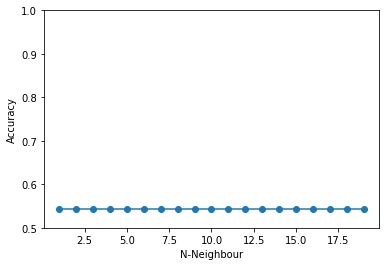

In [128]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.0])

plt.show()